# Hand shape classification

## Introduction

This notebook focuses on distinguishing amongst various signs in Indian Sign Language. It uses three methods for classification -
* Perceptron
* Deep Learning
* KNN

Of all, it is quite evident that KNN provides the best results.

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

data = pd.read_csv('data_letters.csv')
print(data.describe())

no_of_classes = 36
label_indexes = {}
for i in range(26):
    if not chr(ord('a')+i) in ['h','j','v']: label_indexes[chr(ord('a')+i)] = i
for i in range(10): label_indexes[str(i)] = 26+i

          angle_90            r  area_ellipse  area_contour        scale  \
count  6900.000000  6900.000000   6900.000000   6900.000000  6900.000000   
mean      0.441141    98.779841  13445.546435   9604.486739     0.106715   
std       0.302522    23.236679   6254.297257   4141.396539     0.046024   
min       0.000000    34.238000   1810.654000   1562.000000     0.017000   
25%       0.202000    83.559000   8513.656500   6347.750000     0.071000   
50%       0.368500   101.549000  13385.416000   8936.750000     0.099000   
75%       0.650000   115.442250  17563.965750  12802.000000     0.142000   
max       0.999000   150.645000  33050.516000  21713.500000     0.241000   

       eccentricity       norm_r  norm_area_ellipse  norm_area_contour  \
count   6900.000000  6900.000000        6900.000000        6900.000000   
mean       0.775197     0.554450           0.372437           0.399101   
std        0.116933     0.199616           0.200202           0.205513   
min        0.181000

## Data Visualisation using Scatter plots

_Here we can observe how data is distinguished when the features __angle__ and __eccentricity__ are compared from each class_

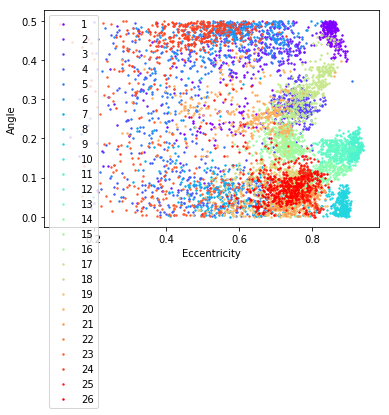

In [20]:
x_axis = data['eccentricity']
y_axis = data['angle_90']
labels = data['label']

x, y =[], []

for i in range(no_of_classes):
    x.append([])
    y.append([])

for i in range(len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])
        
fig = plt.figure()
ax1 = fig.add_subplot(111)
xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(1,no_of_classes+1):
    ax1.scatter(x[i-1], y[i-1], s=2, c=next(colors), label='%d'%(i))
plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Angle')
plt.show()

_Here, we do comparison amongst the attributes __eccentricity__ and __area of contour (Hull)__ from each class_

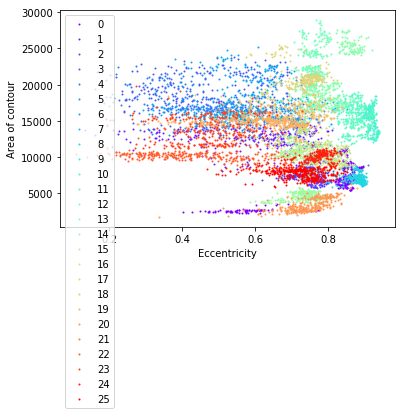

In [21]:
x_axis = data['eccentricity']
y_axis = data['area_contour']
labels = data['label']

x, y =[], []

for i in range(no_of_classes):
    x.append([])
    y.append([])

for i in range(0,len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])

fig = plt.figure()
ax1 = fig.add_subplot(111)
xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(no_of_classes):
    ax1.scatter(x[i], y[i], s=1, c=next(colors),label='%d'%(i))
plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Area of contour')
plt.show()

_Here we consider __area of contour (Hull)__, __eccentricity__ and __radial distance__ to plot a 3D scatter plot_

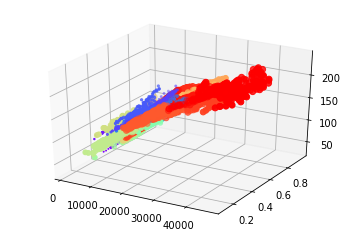

In [69]:
from mpl_toolkits.mplot3d import Axes3D
x_axis = data['area_contour']
y_axis = data['eccentricity']
z_axis = data['r']
labels = data['label']

x, y, z = [], [], []

for i in range(no_of_classes):
    x.append([])
    y.append([])
    z.append([])

for i in range(len(labels)):
    j = label_indexes[labels[i]]
    x[j].append(x_axis[i])
    y[j].append(y_axis[i])
    z[j].append(z_axis[i])
        

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(no_of_classes)]
colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

for i in range(1,no_of_classes+1):
    ax.scatter(x[i-1], y[i-1], z[i-1], s=i, c=next(colors), label='%d'%(i))
plt.show()

_Upon several observations, these 5 features provided the best classification accuracy:_

* Angle
* Radial distance (r)
* Scale
* Eccentricity
* Area of contour (Hull)

__Note that Random state of the `train_test_split` function has a considerable hand in altering the accuracy of the model__

## Using Perceptron learning for classification.

In [57]:
from sklearn.linear_model import perceptron
from numpy import array
import numpy as np
from random import randint

X = data[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']]
Y = data['label']

r_val = randint(1,1000)
print('Random state: %d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3,random_state=204)
# 204
classifier = perceptron.Perceptron(n_iter=30, verbose=0)
classifier.fit(X_train,Y_train)

print('Confusion matrix:')
predictions = classifier.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print('Accuracy on training set: %.3f' % (classifier.score(X_train,Y_train)*100))
print('Accuracy on testing set: %.3f' % (classifier.score(X_test,Y_test)*100))

Random state: 25
Confusion matrix:
[[ 68   0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0
    0  12   0   0   0]
 [  0   0   0  17   0   7   0   0   0   0   0   0   0   0  56   0   0   0
    0   1   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  83   0   0   0
    0   1   0   5   0]
 [  0   0   0  73   0   9   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0]
 [  0   0   0  58   0  30   0   0   0   0   0   0   0   0   5   0   0   0
    0   0   0   0   3]
 [  0   0   0   3   0  76   0   0   0   0   0   0   0   0   7   0   0   0
    0   0   0   0   0]
 [  0   0   0  66   0   2   0   0   0   0  13   0   0   0   0  14   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 108   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  84   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   2  72   0   0   0   0   4   0   0   0
    0   0   0   0 

## Using Deep Learning

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from random import randint

X = data[['angle_90', 'norm_r', 'scale',  'eccentricity', 'norm_area_contour']].values.tolist()
Y = data['label'].values.tolist()

r_val = randint(1,1000)
print('Random state: %d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3,random_state=r_val)
# 100
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_train_labels = encoder.transform(Y_train)
dummy_train_labels = np_utils.to_categorical(encoded_train_labels)

encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_test_labels = encoder.transform(Y_test)
dummy_test_labels = np_utils.to_categorical(encoded_test_labels)

model = Sequential()
model.add(Dense(50, input_dim=5, activation='relu', name='h1'))
model.add(Dense(150, activation='relu', name='h2'))
model.add(Dense(33, activation='softmax', name='op'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,dummy_train_labels,epochs=70,verbose=1,validation_split=0.3)

score = model.evaluate(X_test,dummy_test_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Random state: 486
Train on 5070 samples, validate on 2173 samples
Epoch 1/70
5070/5070 [==============================] - 1s 145us/step - loss: 3.1543 - acc: 0.1444 - val_loss: 2.6076 - val_acc: 0.2402
Epoch 2/70
5070/5070 [==============================] - 0s 70us/step - loss: 2.2566 - acc: 0.3406 - val_loss: 2.0713 - val_acc: 0.3534
Epoch 3/70
5070/5070 [==============================] - 0s 76us/step - loss: 1.9210 - acc: 0.4231 - val_loss: 1.8549 - val_acc: 0.4344
Epoch 4/70
5070/5070 [==============================] - 0s 76us/step - loss: 1.7690 - acc: 0.4572 - val_loss: 1.7338 - val_acc: 0.5053
Epoch 5/70
5070/5070 [==============================] - 0s 73us/step - loss: 1.6659 - acc: 0.4959 - val_loss: 1.6709 - val_acc: 0.5403
Epoch 6/70
5070/5070 [==============================] - 0s 68us/step - loss: 1.5875 - acc: 0.5290 - val_loss: 1.5702 - val_acc: 0.5518
Epoch 7/70
5070/5070 [==============================] - 0s 69us/step - loss: 1.5016 - acc: 0.5495 - val_loss: 1.4903 - val_

Epoch 61/70
5070/5070 [==============================] - 0s 71us/step - loss: 0.5744 - acc: 0.8148 - val_loss: 0.6464 - val_acc: 0.7911
Epoch 62/70
5070/5070 [==============================] - 0s 90us/step - loss: 0.5639 - acc: 0.8142 - val_loss: 0.6377 - val_acc: 0.7911
Epoch 63/70
5070/5070 [==============================] - 0s 95us/step - loss: 0.5645 - acc: 0.8154 - val_loss: 0.6435 - val_acc: 0.7892
Epoch 64/70
5070/5070 [==============================] - 0s 71us/step - loss: 0.5643 - acc: 0.8148 - val_loss: 0.6266 - val_acc: 0.8003
Epoch 65/70
5070/5070 [==============================] - 0s 94us/step - loss: 0.5519 - acc: 0.8199 - val_loss: 0.6287 - val_acc: 0.7897
Epoch 66/70
5070/5070 [==============================] - 0s 98us/step - loss: 0.5510 - acc: 0.8187 - val_loss: 0.6481 - val_acc: 0.7980
Epoch 67/70
5070/5070 [==============================] - 0s 71us/step - loss: 0.5480 - acc: 0.8183 - val_loss: 0.6119 - val_acc: 0.8007
Epoch 68/70
5070/5070 [=========================

## Using K-Nearest Neigbours (with n_neighbors=3)

In [476]:
from sklearn.neighbors import KNeighborsClassifier
from random import randint

X = data[['angle_90', 'norm_r', 'norm_scale',  'eccentricity', 'norm_area_contour']]
Y = data['label']

r_val = randint(1,1000)
print('Random state = %4d'%(r_val))
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.3, random_state=r_val)
# Letters -> 940,4
# with all data -> 254,618,912
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

print('Training accuracy: %.3f' % (classifier.score(X_train, Y_train)*100))
print('Testing accuracy: %.3f' % (classifier.score(X_test, Y_test)*100))

Random state =  662
Training accuracy: 98.178
Testing accuracy: 96.329
